In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns

In [2]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
#df1 = pd.read_csv("1900_2021_DISASTERS.xlsx - emdat data.csv")
df1 = pd.read_csv("C:/Users/babit/OneDrive/Desktop/DAP/Project/1900_2021_DISASTERS.xlsx - emdat data.csv")
df2 = pd.read_csv("C:/Users/babit/OneDrive/Desktop/DAP/Project/1970-2021_DISASTERS.xlsx - emdat data.csv")

In [4]:
df1.head(5)

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14644 non-null  object 
 1   Year                             14644 non-null  int64  
 2   Seq                              14644 non-null  int64  
 3   Glide                            1581 non-null   object 
 4   Disaster Group                   14644 non-null  object 
 5   Disaster Subgroup                14644 non-null  object 
 6   Disaster Type                    14644 non-null  object 
 7   Disaster Subtype                 11897 non-null  object 
 8   Disaster Subsubtype              1044 non-null   object 
 9   Event Name                       3645 non-null   object 
 10  Country                          14644 non-null  object 
 11  ISO                              14644 non-null  object 
 12  Region            

In [7]:
df1.shape

(16126, 45)

In [8]:
df2.shape

(14644, 47)

In [9]:
df2.head(5)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [10]:
#reconstruction costs total count percentage
(31/14644)*100

0.21169079486479106

In the second dataset, we can see that the percentage of total count of reconstruction costs to the total records in the dataset is 0.21%. Therefore, we can drop this column in the dataset.

In [11]:
df2.drop(['Reconstruction Costs (\'000 US$)'], axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dis No                      14644 non-null  object 
 1   Year                        14644 non-null  int64  
 2   Seq                         14644 non-null  int64  
 3   Glide                       1581 non-null   object 
 4   Disaster Group              14644 non-null  object 
 5   Disaster Subgroup           14644 non-null  object 
 6   Disaster Type               14644 non-null  object 
 7   Disaster Subtype            11897 non-null  object 
 8   Disaster Subsubtype         1044 non-null   object 
 9   Event Name                  3645 non-null   object 
 10  Country                     14644 non-null  object 
 11  ISO                         14644 non-null  object 
 12  Region                      14644 non-null  object 
 13  Continent                   146

In [12]:
data = pd.concat([df1, df2], ignore_index=True, sort=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30770 entries, 0 to 30769
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        30770 non-null  int64  
 1   Seq                         30770 non-null  int64  
 2   Glide                       3162 non-null   object 
 3   Disaster Group              30770 non-null  object 
 4   Disaster Subgroup           30770 non-null  object 
 5   Disaster Type               30770 non-null  object 
 6   Disaster Subtype            24913 non-null  object 
 7   Disaster Subsubtype         2121 non-null   object 
 8   Event Name                  7506 non-null   object 
 9   Country                     30770 non-null  object 
 10  ISO                         30770 non-null  object 
 11  Region                      30770 non-null  object 
 12  Continent                   30770 non-null  object 
 13  Location                    276

In [13]:
data.drop(['Dis No'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30770 entries, 0 to 30769
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        30770 non-null  int64  
 1   Seq                         30770 non-null  int64  
 2   Glide                       3162 non-null   object 
 3   Disaster Group              30770 non-null  object 
 4   Disaster Subgroup           30770 non-null  object 
 5   Disaster Type               30770 non-null  object 
 6   Disaster Subtype            24913 non-null  object 
 7   Disaster Subsubtype         2121 non-null   object 
 8   Event Name                  7506 non-null   object 
 9   Country                     30770 non-null  object 
 10  ISO                         30770 non-null  object 
 11  Region                      30770 non-null  object 
 12  Continent                   30770 non-null  object 
 13  Location                    276

In [14]:
data.shape

(30770, 45)

In [15]:
data.drop_duplicates(keep='first',inplace=True)

In [16]:
data.shape

(16126, 45)

In [17]:
data.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


In [18]:
#categorical and numerical columns
categorical = list()
numerical = list()
other = list()
for c,t in zip(data.dtypes.index.to_list(),data.dtypes.to_list()):
    if t=="object":
        categorical.append(c)
    elif t=="int64" or t=="float64":
        numerical.append(c)
    else:
        other.append(c)

print("Numerical Columns: ",numerical)
print("\nCategorical Columns: ",categorical)
print("\nOther Columns: ",other)

Numerical Columns:  ['Year', 'Seq', 'Aid Contribution', 'Dis Mag Value', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)", "Total Damages ('000 US$)", 'CPI']

Categorical Columns:  ['Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations']

Other Columns:  []


In [19]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

def summary_table(df):

    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

def bar_plot(x,y,xlabel,ylabel,title, label):
    plt.figure(figsize=(20,5))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.barplot(x=x, y = y, palette="Blues_d")
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=90,fontsize = 12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    
    if label == 'percent':
        for p in ax.patches:
                     ax.annotate("%.1f%%" % (100*float(p.get_height()/15827)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                         ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'vertical',
                         textcoords='offset points')
    if label == 'number':
        for p in ax.patches:
             ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                 ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
                 textcoords='offset points')

def Null_Analysis(df,title):
    null_columns=df.columns[df.isnull().any()]
    null_columns_plot = df[null_columns].isnull().sum().sort_values(ascending = False)
    bar_plot(null_columns_plot.index, null_columns_plot,"Features", "Number of Null Values", title, 'percent')

In [20]:
basic_EDA(data)

Number of Samples: 16126,
Number of Features: 45,
Duplicated Entries: 0,
Null Entries: 329417,
Number of Rows with Null Entries: 16126 100.0%


The summary below is helpful to give an overview of our features. The table below explains which features are categorical, which ones are numerical and we start to see a pattern of the missing values. As the feature become more specific to an event, such as cost or Local Time, more missing values are present.

In [21]:
summary_table(data)

,Name,dtypes,Missing,Uniques
0,Year,int64,0,122
1,Seq,int64,0,1274
2,Glide,object,14545,1086
3,Disaster Group,object,0,1
4,Disaster Subgroup,object,0,6
5,Disaster Type,object,0,15
6,Disaster Subtype,object,3110,27
7,Disaster Subsubtype,object,15049,12
8,Event Name,object,12265,1571
9,Country,object,0,228


The graph below is a more friendly way to display the number of missing values by feature. While there are attributes with almost 100% of missing values, the most crucial information regarding the events have relatively low missing values or no missing values. If such features had a higher number of missing values it would be necessary to ignore such samples or to use some kind of imputation method, which could reduce the representativeness of the dataset.

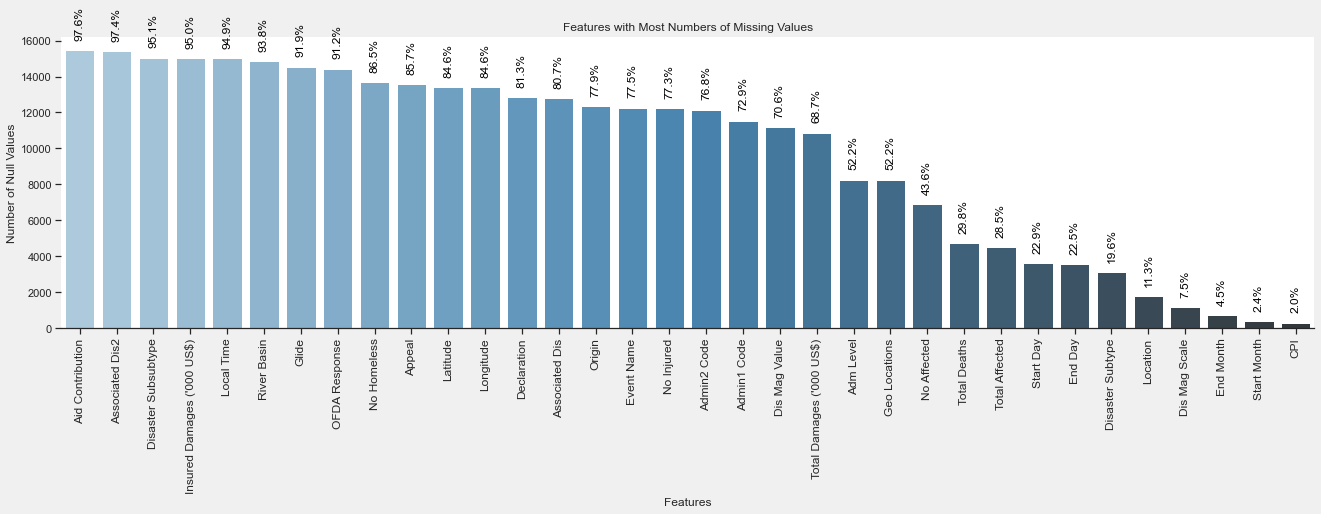

In [22]:
Null_Analysis(data,'Features with Most Numbers of Missing Values')

The table below is an extraction of the DataFrame, and explains the hierarchy used by EM-DAT to organize the events. As shown by the above plot, Disaster Subtype and Subsubtype are not present for all samples and have been replaced with a "-" for demonstration.

In [23]:
info_subgroups = data.loc[:,['Disaster Subgroup','Disaster Type','Disaster Subtype','Disaster Subsubtype']]

values = {'Disaster Subtype': '-', 'Disaster Subsubtype': '-'}
info_subgroups = info_subgroups.fillna(value=values)

data_subgroups = pd.DataFrame(info_subgroups.groupby(['Disaster Subgroup','Disaster Type','Disaster Subtype','Disaster Subsubtype']).size().to_frame('Count'))
data_subgroups.iloc[:,:-1]

Empty DataFrame
Columns: []
Index: [(Biological, Animal accident, -, -), (Biological, Epidemic, -, -), (Biological, Epidemic, Bacterial disease, -), (Biological, Epidemic, Parasitic disease, -), (Biological, Epidemic, Viral disease, -), (Biological, Insect infestation, -, -), (Biological, Insect infestation, Grasshopper, -), (Biological, Insect infestation, Locust, -), (Climatological, Drought, -, -), (Climatological, Drought, Drought, -), (Climatological, Glacial lake outburst, -, -), (Climatological, Wildfire, -, -), (Climatological, Wildfire, Forest fire, -), (Climatological, Wildfire, Land fire (Brush, Bush, Pasture), -), (Extra-terrestrial, Impact, -, -), (Geophysical, Earthquake, -, -), (Geophysical, Earthquake, Ground movement, -), (Geophysical, Earthquake, Tsunami, -), (Geophysical, Mass movement (dry), -, -), (Geophysical, Mass movement (dry), Avalanche, -), (Geophysical, Mass movement (dry), Landslide, -), (Geophysical, Mass movement (dry), Landslide, Mudslide), (Geophysical, Mass movement (dry), Rockfall, -), (Geophysical, Mass movement (dry), Subsidence, Sudden subsidence), (Geophysical, Volcanic activity, -, -), (Geophysical, Volcanic activity, Ash fall, -), (Geophysical, Volcanic activity, Lava flow, -), (Geophysical, Volcanic activity, Pyroclastic flow , -), (Hydrological, Flood, -, -), (Hydrological, Flood, Coastal flood, -), (Hydrological, Flood, Flash flood, -), (Hydrological, Flood, Riverine flood, -), (Hydrological, Landslide, -, -), (Hydrological, Landslide, Avalanche, -), (Hydrological, Landslide, Avalanche, Winter storm/Blizzard), (Hydrological, Landslide, Landslide, -), (Hydrological, Landslide, Mudslide, -), (Hydrological, Landslide, Rockfall, -), (Hydrological, Landslide, Subsidence, Sudden subsidence), (Meteorological, Extreme temperature , Cold wave, -), (Meteorological, Extreme temperature , Heat wave, -), (Meteorological, Extreme temperature , Severe winter conditions, -), (Meteorological, Extreme temperature , Severe winter conditions, Snow/Ice), (Meteorological, Fog, -, -), (Meteorological, Storm, -, -), (Meteorological, Storm, Convective storm, -), (Meteorological, Storm, Convective storm, Derecho), (Meteorological, Storm, Convective storm, Hail), (Meteorological, Storm, Convective storm, Lightning/Thunderstorms), (Meteorological, Storm, Convective storm, Rain), (Meteorological, Storm, Convective storm, Sand/Dust storm), (Meteorological, Storm, Convective storm, Severe storm), (Meteorological, Storm, Convective storm, Storm/Surge), (Meteorological, Storm, Convective storm, Tornado), (Meteorological, Storm, Convective storm, Winter storm/Blizzard), (Meteorological, Storm, Extra-tropical storm, -), (Meteorological, Storm, Tropical cyclone, -)]

In [24]:
data.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,16126.000000,16126.000000,6.770000e+02,4.946000e+03,16126.00000,15739.000000,12498.000000,16126.000000,15418.000000,12570.000000,1.141300e+04,3.895000e+03,9.220000e+03,2.430000e+03,1.161700e+04,1.096000e+03,5.245000e+03,15811.000000
mean,1996.764790,714.784820,1.254136e+05,4.735038e+04,1996.77837,6.444374,15.233957,1996.835607,6.576728,15.775020,2.842866e+03,2.621102e+03,8.823612e+05,7.329314e+04,7.165088e+05,7.986514e+05,7.247835e+05,63.215103
std,20.159065,1929.635089,2.997875e+06,3.094242e+05,20.15571,3.393965,8.953821,20.143010,3.352965,8.865486,6.860595e+04,3.440343e+04,8.573913e+06,5.230058e+05,7.718598e+06,3.057638e+06,4.723131e+06,26.734285
min,1900.000000,1.000000,1.000000e+00,-5.700000e+01,1900.00000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,3.221647
25%,1989.000000,93.000000,1.750000e+02,7.000000e+00,1989.00000,4.000000,7.000000,1989.000000,4.000000,8.000000,6.000000e+00,1.400000e+01,1.244750e+03,5.725000e+02,6.500000e+02,5.000000e+04,8.300000e+03,45.692897
50%,2001.000000,270.000000,7.210000e+02,1.515000e+02,2001.00000,7.000000,15.000000,2001.000000,7.000000,16.000000,2.000000e+01,5.000000e+01,1.000000e+04,3.000000e+03,5.965000e+03,1.725000e+05,6.000000e+04,68.415379
75%,2011.000000,486.000000,3.511000e+03,1.129650e+04,2011.00000,9.000000,23.000000,2011.000000,9.000000,23.000000,6.300000e+01,2.000000e+02,9.182300e+04,1.750000e+04,5.825500e+04,5.000000e+05,3.173000e+05,84.252733
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.00000,12.000000,31.000000,2021.000000,12.000000,31.000000,3.700000e+06,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,6.000000e+07,2.100000e+08,100.000000


### Missing Values Treatment

In [25]:
#replacig missing values in categorical columns with Unknown
for col in categorical:
    data[col] = data[col].fillna("Unknown")

In [26]:
summary_table(data)

,Name,dtypes,Missing,Uniques
0,Year,int64,0,122
1,Seq,int64,0,1274
2,Glide,object,0,1087
3,Disaster Group,object,0,1
4,Disaster Subgroup,object,0,6
5,Disaster Type,object,0,15
6,Disaster Subtype,object,0,28
7,Disaster Subsubtype,object,0,13
8,Event Name,object,0,1571
9,Country,object,0,228


In [27]:
#replacing missing values in numerical columns with median of the column
for col in numerical:
    data[col] = data[col].fillna(data[col].median())

In [28]:
summary_table(data)

,Name,dtypes,Missing,Uniques
0,Year,int64,0,122
1,Seq,int64,0,1274
2,Glide,object,0,1087
3,Disaster Group,object,0,1
4,Disaster Subgroup,object,0,6
5,Disaster Type,object,0,15
6,Disaster Subtype,object,0,28
7,Disaster Subsubtype,object,0,13
8,Event Name,object,0,1571
9,Country,object,0,228


In [29]:
data.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,16126.000000,16126.000000,1.612600e+04,1.612600e+04,16126.00000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,1.612600e+04,1.612600e+04,1.612600e+04,1.612600e+04,1.612600e+04,1.612600e+04,1.612600e+04,16126.000000
mean,1996.764790,714.784820,5.955832e+03,1.462785e+04,1996.77837,6.457708,15.181322,1996.835607,6.595312,15.824631,2.017852e+03,6.710121e+02,5.087703e+05,1.359236e+04,5.178332e+05,2.150562e+05,2.762216e+05,63.316684
std,20.159065,1929.635089,6.143234e+05,1.727282e+05,20.15571,3.354069,7.883059,20.143010,3.279677,7.827695,5.772983e+04,1.694213e+04,6.497283e+06,2.045398e+05,6.558898e+06,8.122252e+05,2.711411e+06,26.481653
min,1900.000000,1.000000,1.000000e+00,-5.700000e+01,1900.00000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,3.221647
25%,1989.000000,93.000000,7.210000e+02,1.515000e+02,1989.00000,4.000000,10.000000,1989.000000,4.000000,10.000000,1.000000e+01,5.000000e+01,6.000000e+03,3.000000e+03,1.700000e+03,1.725000e+05,6.000000e+04,47.898497
50%,2001.000000,270.000000,7.210000e+02,1.515000e+02,2001.00000,7.000000,15.000000,2001.000000,7.000000,16.000000,2.000000e+01,5.000000e+01,1.000000e+04,3.000000e+03,5.965000e+03,1.725000e+05,6.000000e+04,68.415379
75%,2011.000000,486.000000,7.210000e+02,1.515000e+02,2011.00000,9.000000,21.000000,2011.000000,9.000000,21.000000,3.600000e+01,5.000000e+01,1.625950e+04,3.000000e+03,2.187900e+04,1.725000e+05,6.000000e+04,84.252733
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.00000,12.000000,31.000000,2021.000000,12.000000,31.000000,3.700000e+06,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,6.000000e+07,2.100000e+08,100.000000


In [30]:
data.corr()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
Year,1.000000,0.011802,0.008139,0.037254,0.999724,-0.036082,-0.013875,0.999373,-0.020751,0.011544,-0.104869,0.003979,0.004649,-0.015770,0.004194,0.036258,0.041488,0.935615
Seq,0.011802,1.000000,-0.001409,-0.012531,0.012827,0.005023,-0.003685,0.020164,0.070118,0.011261,0.046421,-0.008892,0.105687,-0.013309,0.104283,-0.003157,0.000878,0.005280
Aid Contribution,0.008139,-0.001409,1.000000,-0.000579,0.008135,-0.000982,-0.000301,0.008125,0.003549,0.000131,-0.000034,0.001033,0.001313,0.001027,0.001338,-0.000354,0.001702,0.009608
Dis Mag Value,0.037254,-0.012531,-0.000579,1.000000,0.037204,-0.003872,-0.017290,0.037532,-0.007420,0.004730,-0.002096,0.006669,0.048876,0.006950,0.048666,-0.001655,0.007950,0.044038
Start Year,0.999724,0.012827,0.008135,0.037204,1.000000,-0.036526,-0.014025,0.999665,-0.021018,0.011386,-0.104908,0.003958,0.004653,-0.015812,0.004197,0.036229,0.041443,0.935306
Start Month,-0.036082,0.005023,-0.000982,-0.003872,-0.036526,1.000000,0.052477,-0.035704,0.869600,0.017494,0.005939,-0.013913,-0.009233,0.008464,-0.008906,0.006197,0.000249,-0.021510
Start Day,-0.013875,-0.003685,-0.000301,-0.017290,-0.014025,0.052477,1.000000,-0.013691,0.041244,0.621744,0.000054,-0.003567,-0.005477,-0.010251,-0.005758,0.008323,0.007312,-0.015288
End Year,0.999373,0.020164,0.008125,0.037532,0.999665,-0.035704,-0.013691,1.000000,-0.022328,0.011472,-0.104590,0.003988,0.005385,-0.015963,0.004917,0.036153,0.041436,0.935099
End Month,-0.020751,0.070118,0.003549,-0.007420,-0.021018,0.869600,0.041244,-0.022328,1.000000,0.010925,0.006276,0.000971,0.016869,0.010815,0.017067,0.010757,0.006311,-0.005955
End Day,0.011544,0.011261,0.000131,0.004730,0.011386,0.017494,0.621744,0.011472,0.010925,1.000000,0.000926,0.002699,0.015456,0.009491,0.015611,0.012032,0.011809,0.011123


### Visualization

In this section we aim to answer what is most common, the most critical, and have a better insight on the magnitude Natural Disasters consequences in a worldwide view.

In [ ]:
sns.pairplot(data)

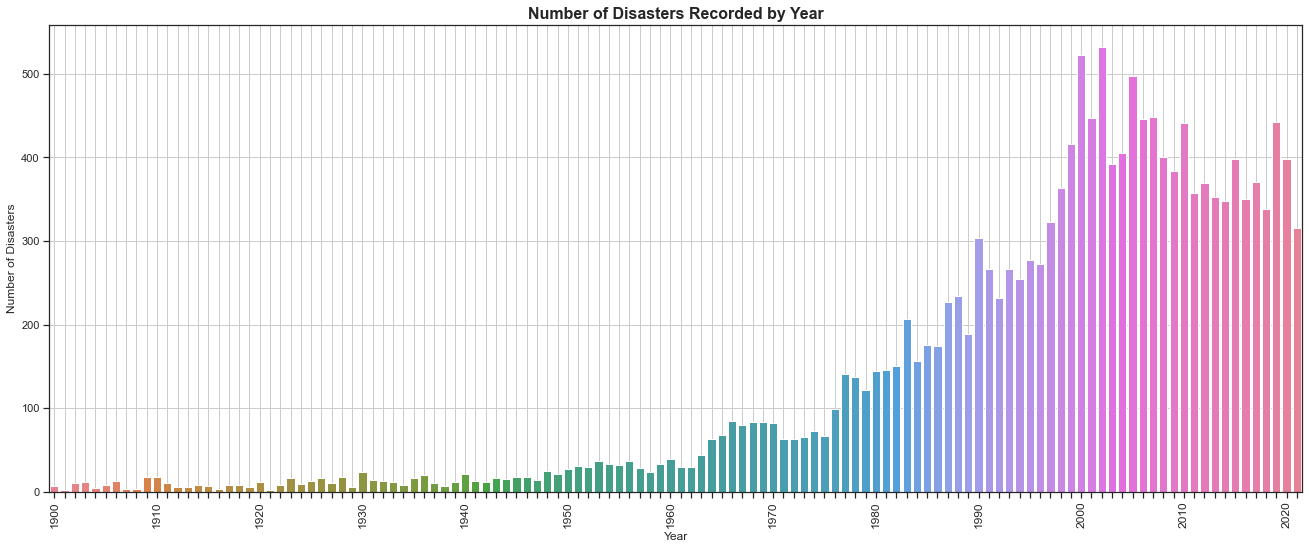

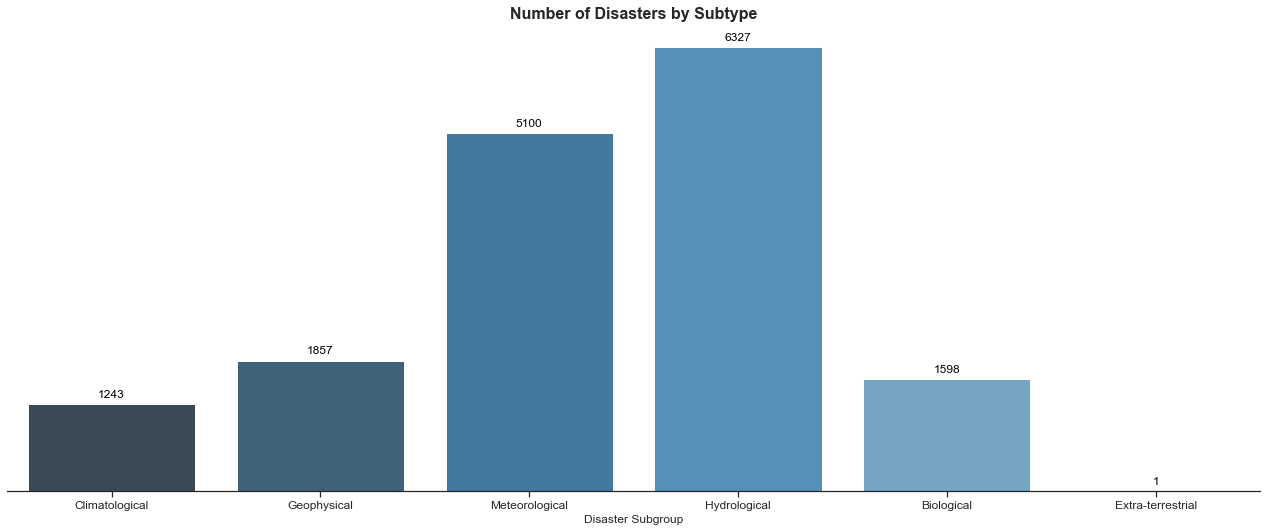

In [30]:
data_general = data.loc[:,['Year','Disaster Subgroup','Disaster Type','Total Deaths','Total Affected']]
#data_general = data_general[data_general['Disaster Subgroup'] != 'Extra-terrestrial']

#Plot 'Number of Disasters Recorded by Year'
plt.figure(figsize=(20,8))
ax = sns.countplot(data = data_general,x='Year', palette = 'husl')
plt.xticks(rotation=90,fontsize = 12)
ax.grid()
#Avoid ticks to crowd the X axis
for label in ax.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Disasters')
plt.title('Number of Disasters Recorded by Year', fontsize = 16,weight = 'bold');    

# Plot 'Number of Disasters by Subtype'
plt.figure(figsize=(20,8))
ax = sns.countplot(data = data_general,x='Disaster Subgroup', palette = 'Blues_d')

for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(0, 5),rotation = 'horizontal',textcoords='offset points')

ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False)         
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Disaster Subgroup')
ax.set_ylabel('Number of Disasters')
plt.title('Number of Disasters by Subtype', fontsize = 16,weight = 'bold');  

1. The yearly quantity of Natural Disasters rise upto the year 2000. For the last 10 years, the total number seems to fluctuate around 300 - 400 Natural Disaster per Year.
2. Between 2000 and 2010 it has been a period where the total number of Natural Disaster were higher. 
3. The most common type of disaster are from Hydrological nature, followed by Metereological nature.

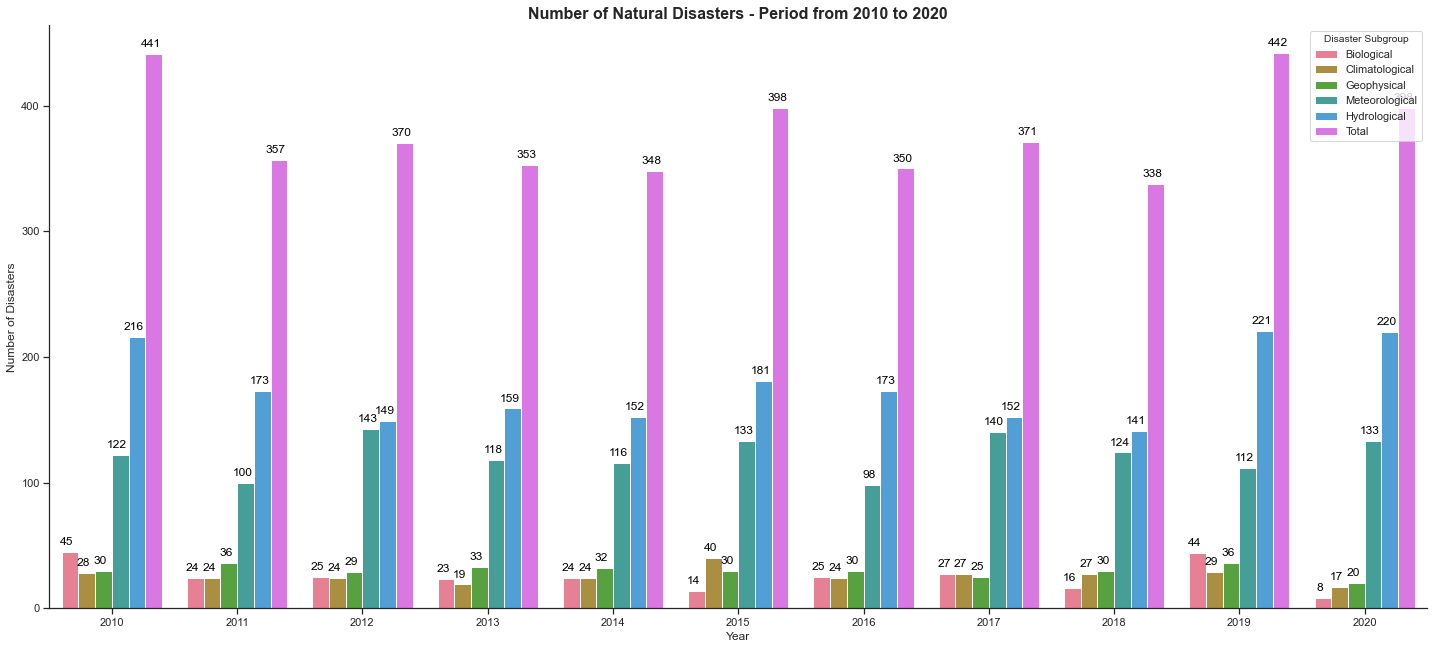

In [31]:
rec_dis = data_general[(data_general['Year'] >= 2010) & (data_general['Year'] <= 2020)]
rec_dis = rec_dis.groupby(['Disaster Subgroup','Year']).size().reset_index(name="Count")

total = rec_dis.groupby(['Year']).sum().reset_index()
total['Disaster Subgroup'] = list(['Total']*11)
total = total.loc[:,['Disaster Subgroup','Year','Count']]

rec_dis = rec_dis.append(total, ignore_index = True)

plt.figure(figsize=(22,10))

ax = sns.barplot(data=rec_dis, x='Year', y = 'Count',hue ='Disaster Subgroup', 
                 hue_order = ['Biological', 'Climatological', 'Geophysical','Meteorological','Hydrological','Total'],
                 palette = "husl")

for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(-3, 5),rotation = 'horizontal',textcoords='offset points')

sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Disasters')
plt.title("Number of Natural Disasters - Period from 2010 to 2020", fontsize = 16,weight = 'bold');


The above graph analyses the number of Natural Disasters in the last ten years in more detail.

1. 2019 and 2010 were also the years with a higher number of Natural Disasters in total, with 441 and 442 respectively. Both years present a higher number than usual of Biological, and Hydrological events.

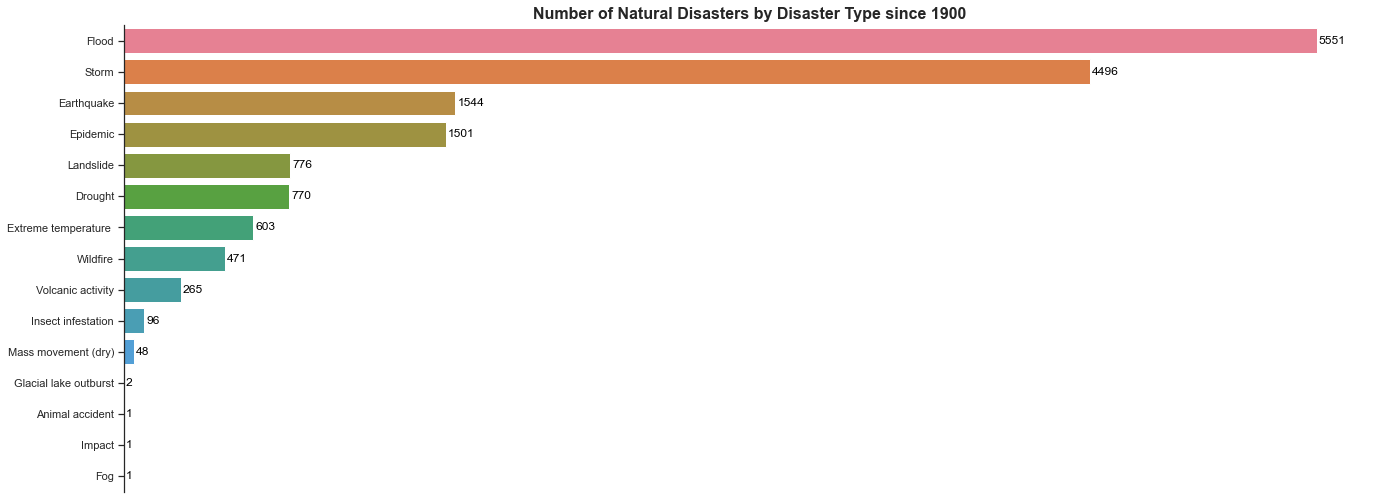

In [32]:
graph_subgroups = info_subgroups.groupby(['Disaster Subgroup','Disaster Type']).size().to_frame('Count').reset_index()
graph_subgroups.sort_values('Count',ascending=False, inplace=True)

plt.figure(figsize=(20,8))

ax = sns.barplot(data=graph_subgroups, x='Count', y = 'Disaster Type', ci=None, palette = 'husl')

for p in ax.patches:
        width = int(p.get_width())
        ax.annotate("%d" % p.get_width(), (width, p.get_y() + p.get_height()/ 2),
        ha='left', va='center', color='black', xytext=(2, 0),rotation = 'horizontal',textcoords='offset points')
        

sns.despine(top=True, right=True, left=False, bottom=True)
ax.set_xlabel('Number of Occurrences')
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.axes.get_xaxis().set_visible(False) 

plt.title("Number of Natural Disasters by Disaster Type since 1900", fontsize = 16,weight = 'bold');

The bar chart above illustrates how the Natural Disasters subtypes are distributed. The analysis considers all the events since 1900.

1. The EM-DAT has a record of 5051 floods since 1900 and 4496 Storms. These two events accounts for 60% of all the disasters.
2. It is interesting that Earthquakes are almost as "common" as Epidemic disasters.

Let's analyse how the individual Natural Disasters have been recorded across the years, and check for any patterns and trends.

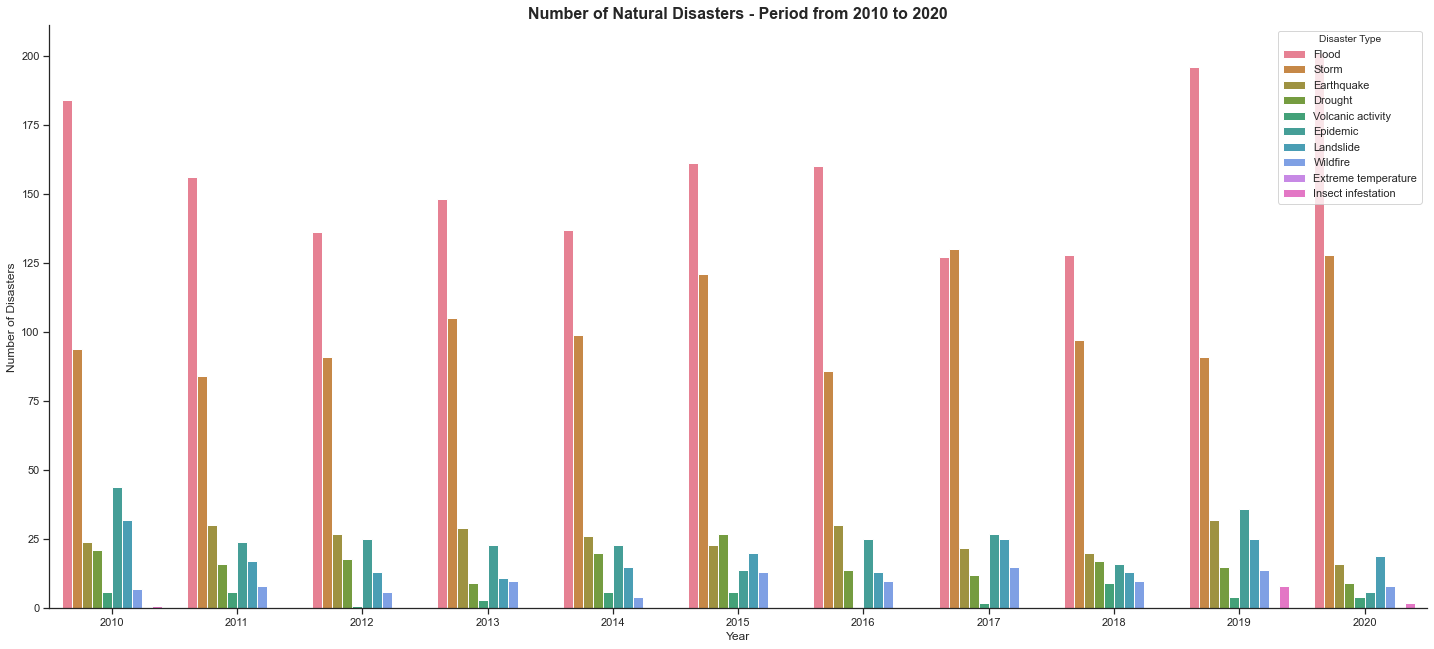

In [33]:
rec_dis = data_general[(data_general['Year'] >= 2010) & (data_general['Year'] <= 2020)]
rec_dis = rec_dis.groupby(['Disaster Type','Year']).size().reset_index(name="Count")

total = rec_dis.groupby(['Year']).sum().reset_index()
total['Disaster Type'] = list(['Total']*11)
total = total.loc[:,['Disaster Type','Year','Count']]

rec_dis = rec_dis.append(total, ignore_index = True)

plt.figure(figsize=(22,10))

ax = sns.barplot(data=rec_dis, x='Year', y = 'Count',hue ='Disaster Type', 
                 hue_order = ['Flood', 'Storm', 'Earthquake','Drought','Volcanic activity','Epidemic','Landslide','Wildfire','Extreme temperature','Insect infestation'],
                 palette = "husl")


sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Disasters')
plt.title("Number of Natural Disasters - Period from 2010 to 2020", fontsize = 16,weight = 'bold');


1. Floods and  Storms are the disasters that are presenting higher number of occurrences in recent years. 

In this section we analyse in more depth the Number of Fatalities and Total Number of Affected people for each disaster type. On this analysis, only the Total Affected is taken into account as it aggregates all the people who were injured or made homeless due to the disaster occurrence.

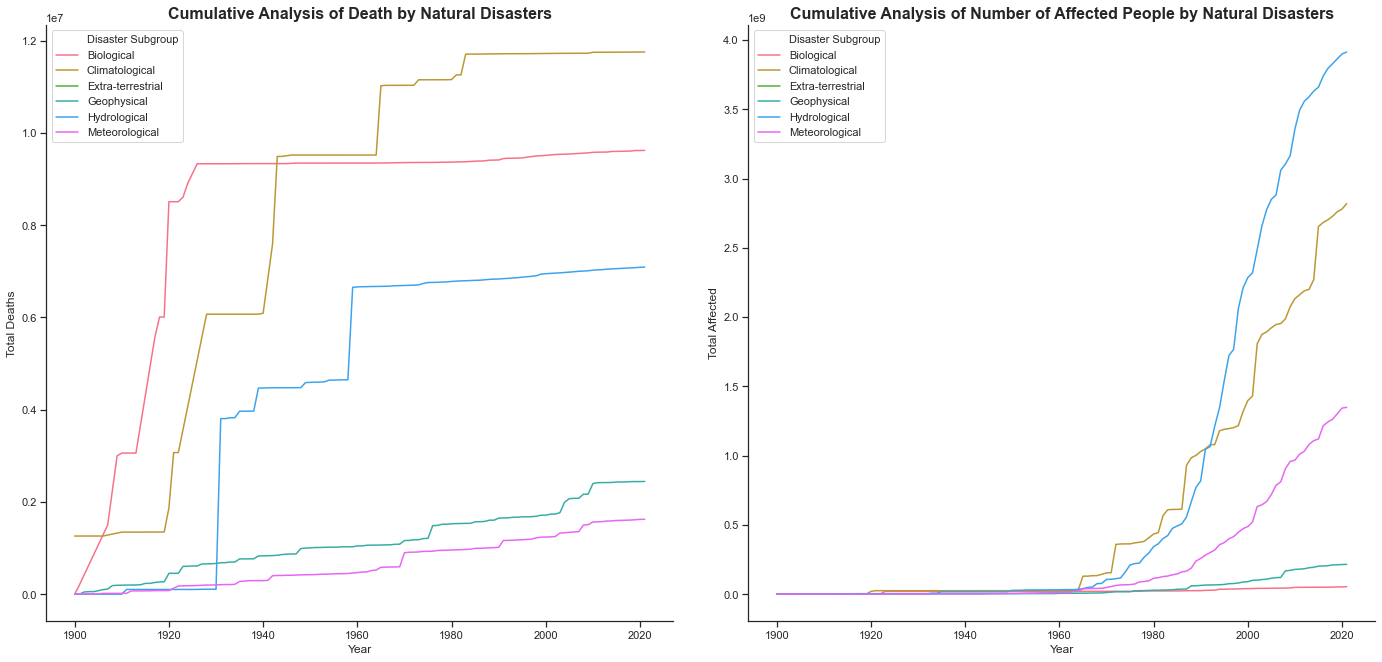

In [34]:
death_cumsum = data_general.groupby(['Disaster Subgroup','Year']).sum()\
                .groupby(['Disaster Subgroup']).cumsum().reset_index()

fig, axarr = plt.subplots(1, 2, figsize=(20, 10))
sns.despine(top=True, right=True, left=False, bottom=False)

sns.lineplot(x = 'Year', y = 'Total Deaths', hue='Disaster Subgroup',data=death_cumsum, palette = "husl", ax = axarr[0])
sns.lineplot(x = 'Year', y = 'Total Affected', hue='Disaster Subgroup',data=death_cumsum, palette = "husl", ax = axarr[1])

axarr[0].set_title("Cumulative Analysis of Death by Natural Disasters",fontsize = 16,weight = 'bold')
axarr[1].set_title("Cumulative Analysis of Number of Affected People by Natural Disasters",fontsize = 16,weight = 'bold')
fig.tight_layout(pad=3.0)  
plt.show()


The two features show a very distinct pattern. While the fatalities increase in a more stepwise manner, the number of affected people displays an exponential growth
The steps we see in the Number of Deaths could be related to specific events. However, it is interesting to note that after 1960 - 1980 all events seem to rise more linearly. As such, the steps could be also related to difficulties in data collection
Looking at the Number of Casualties for Biological disasters, between 1900 - 1920 there is a sharp rise and the stabilise in a linear pattern
Metereological and Geophysical events are the only ones that have a more linear pattern from the early 1900. One reason could be that earthquakes and severe storms were more commonly tracked by the Government and other Institutions early on. In addition, extreme floods or draughts do not happen every year, as such these large jumps in the graph appear as a consequence

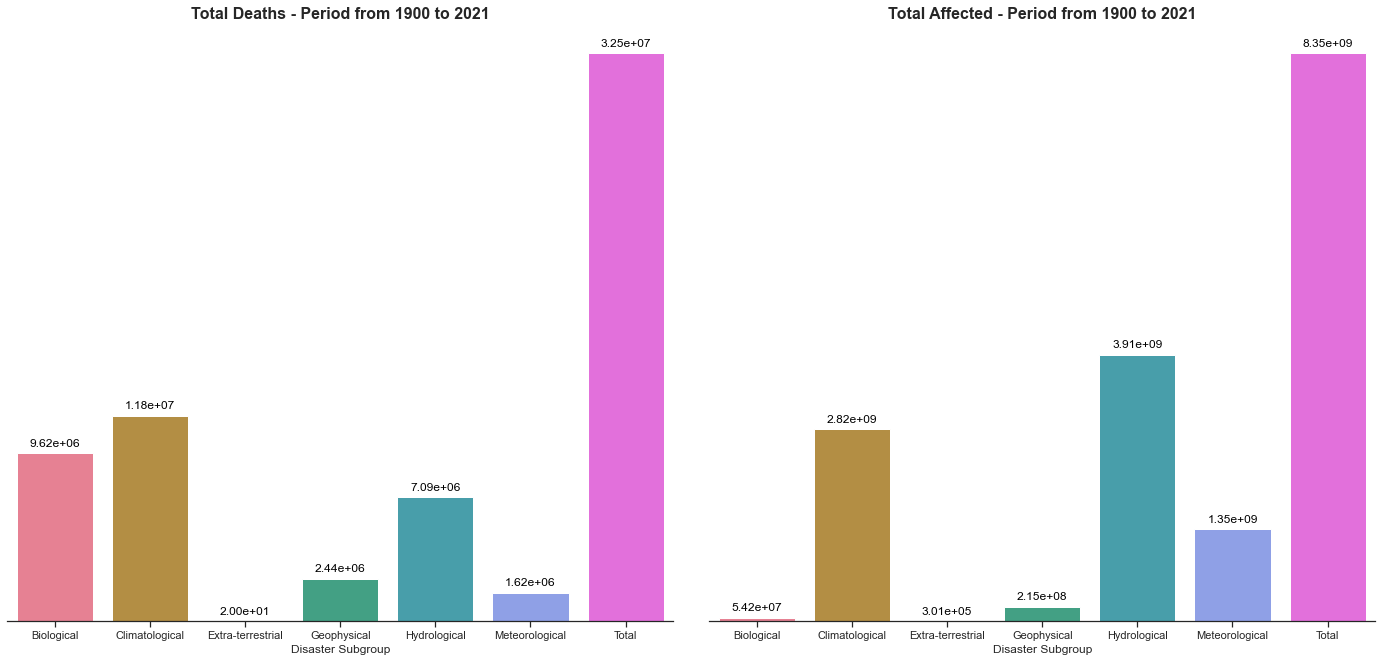

In [35]:
nd_deaths = data_general.loc[:,['Disaster Subgroup','Total Deaths','Total Affected']]
nd_deaths = nd_deaths.groupby(['Disaster Subgroup']).sum().reset_index()

nd_deaths['Death%'] = 100*(nd_deaths['Total Deaths'].div(nd_deaths['Total Deaths'].sum()))
nd_deaths['Affected%'] = 100*(nd_deaths['Total Affected'].div(nd_deaths['Total Affected'].sum()))
total_row = {'Disaster Subgroup':'Total',
             'Total Deaths':nd_deaths['Total Deaths'].sum(), 
             'Total Affected':nd_deaths['Total Affected'].sum()}

nd_deaths = nd_deaths.append(total_row,ignore_index=True)
nd_deaths['DeathRatio'] = nd_deaths['Total Deaths'].div(nd_deaths['Total Affected'])

fig, axarr = plt.subplots(1, 2, figsize=(20, 10))

sns.despine(top=True, right=True, left=True, bottom=False)

dfs = list(['Total Deaths','Total Affected'])
z = 0

for i in dfs:
    ax = sns.barplot(data=nd_deaths, x='Disaster Subgroup', y = i ,ax=axarr[z], palette = "husl")
    
    for p in ax.patches:
        ax.annotate("%s" % ("{:.2e}".format(p.get_height())), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(0, 5),rotation = 'horizontal',textcoords='offset points')

    axarr[z].set(yticklabels=[])
    axarr[z].axes.get_yaxis().set_visible(False) 
    axarr[z].set_title(i + " - Period from 1900 to 2021",fontsize = 16,weight = 'bold')
    z +=1

fig.tight_layout(pad=3.0)    
plt.show()

The analysis also shows that Climatological events are a dangerous threat as they combine a high number of deaths and a significant number of affected pepople, being only behind Hydrological events.

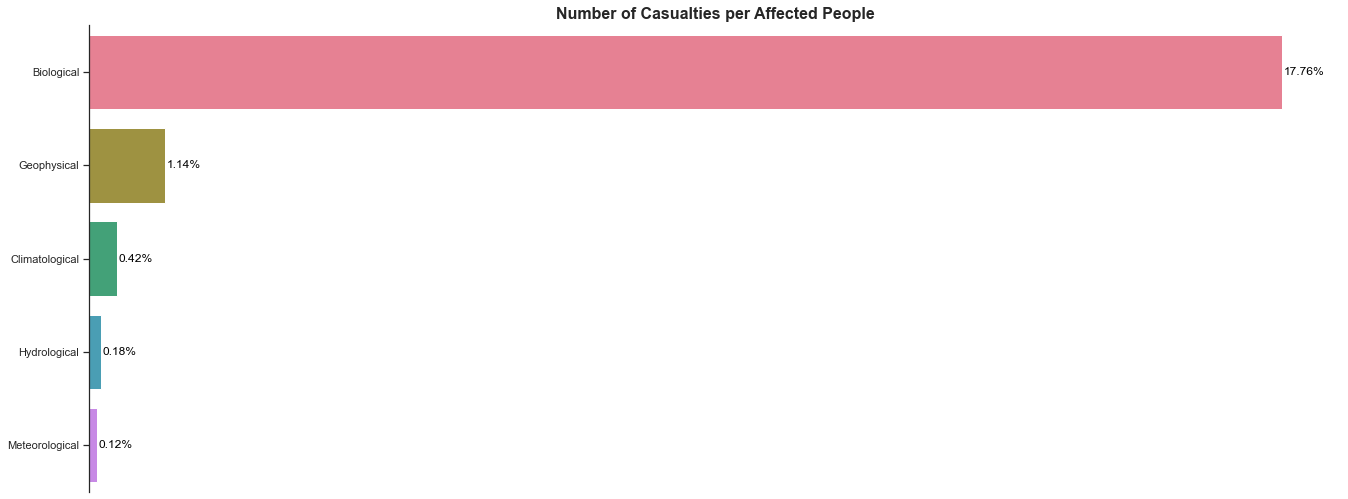

In [36]:
nd_deaths = nd_deaths.sort_values(by = 'DeathRatio', ascending = False)

plt.figure(figsize=(20,8))
ax = sns.barplot(data=nd_deaths, x='DeathRatio', y = 'Disaster Subgroup',  palette = 'husl',order=['Biological', 'Geophysical','Climatological', 'Hydrological','Meteorological'])

for p in ax.patches:
        width = int(p.get_width())
        ax.annotate("%.2f%%" % (p.get_width()*100), (p.get_width(), p.get_y() + p.get_height()/ 2),
        ha='left', va='center', color='black', xytext=(2, 0),rotation = 'horizontal',textcoords='offset points')
        

sns.despine(top=True, right=True, left=False, bottom=True)
ax.set_xlabel('Number of Occurrences')
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.axes.get_xaxis().set_visible(False) 

plt.title("Number of Casualties per Affected People", fontsize = 16,weight = 'bold');

The graph above displays the Death per Affected People ratio of each Natural Disaster. As presumed, Biological disasters have a higher indice than any other. While a Geophysical event kills 1 (1.14%) when 100 people are affected, Biological events have killed 17 (17.76%) for every 100 people affected.

<AxesSubplot:xlabel='Continent'>

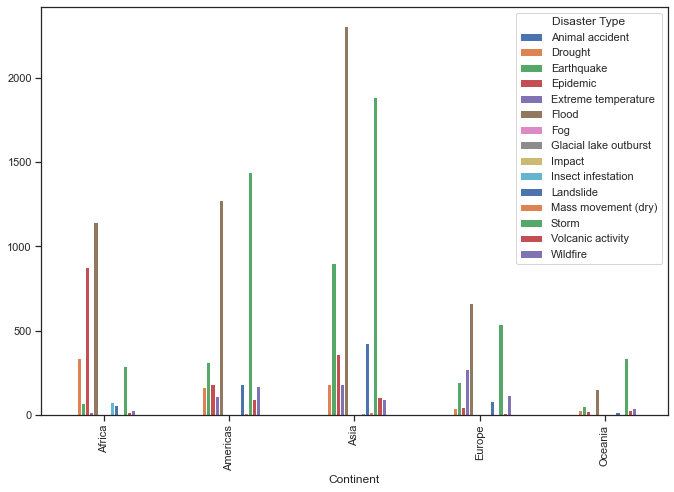

In [37]:
data.pivot_table(index='Continent',columns='Disaster Type',aggfunc='size').plot(kind='bar',figsize=(10, 7))

The above graph displays the total number of occurrences of disasters for each continent during the period 1900 - 2021.

1. Asia has faced the most number of disasters in which most of them are floods.

In [38]:
df_pivot = data.pivot_table(index='Country',columns='Disaster Type',aggfunc='size')
df_pivot.fillna(0)

Disaster Type,Animal accident,Drought,Earthquake,Epidemic,Extreme temperature,Flood,Fog,Glacial lake outburst,Impact,Insect infestation,Landslide,Mass movement (dry),Storm,Volcanic activity,Wildfire
Country,,,,,,,,,,,,,,,
Afghanistan,0.0,8.0,33.0,20.0,7.0,98.0,0.0,0.0,0.0,1.0,28.0,0.0,9.0,0.0,1.0
Albania,0.0,1.0,16.0,2.0,5.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
Algeria,0.0,1.0,21.0,2.0,3.0,52.0,0.0,0.0,0.0,2.0,1.0,0.0,4.0,0.0,3.0
American Samoa,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Angola,0.0,8.0,0.0,20.0,0.0,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen Arab Rep,0.0,2.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Yemen P Dem Rep,0.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yugoslavia,0.0,1.0,11.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


The above table displays the number of disasters per disaster type for each country.

In [39]:
m=data[['Country','Disaster Type']].groupby('Country').describe()
m['Disaster Type'].sort_values(by='count',ascending=False).head(10)

,count,unique,top,freq
Country,,,,
United States of America (the),1087,9,Storm,684
China,980,10,Storm,318
India,752,11,Flood,311
Philippines (the),668,10,Storm,375
Indonesia,572,9,Flood,242
Japan,375,9,Storm,187
Bangladesh,356,7,Storm,182
Mexico,293,9,Storm,120
Iran (Islamic Republic of),252,9,Earthquake,131


The above table shows to check which countries are prone to what kinds of Natural Disasters.

The below chart depicts the CPI level for each disaster across the years.

<AxesSubplot:xlabel='Year', ylabel='Disaster Subgroup-Disaster Type'>

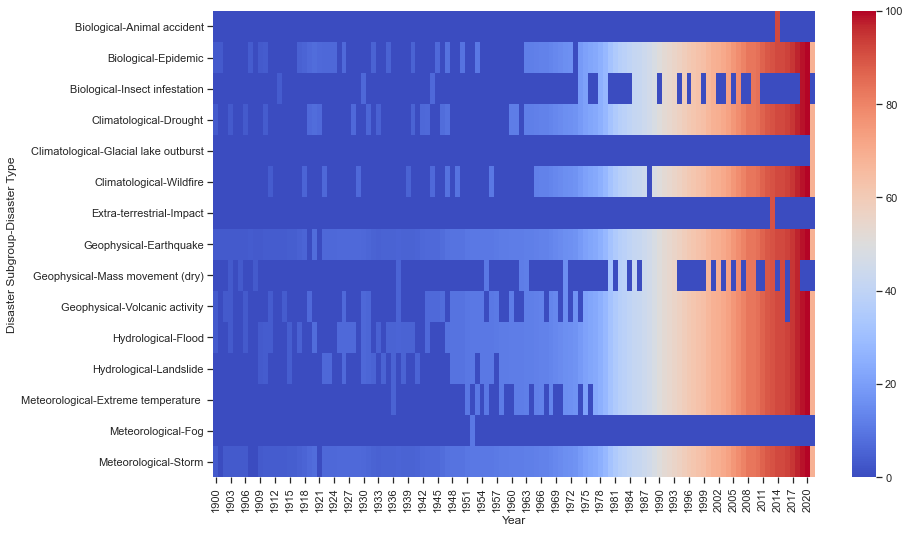

In [40]:
#heatmap
pt = data.pivot_table(values ='CPI', index = ['Disaster Subgroup','Disaster Type'], columns = 'Year').fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(pt, cmap='coolwarm')

### Research Question

Predict the frequency of the main disasters from 2022 onwards and evaluate if there is an increasing trend in the time series of these disasters.

In [41]:
data['Start Month'].replace(0,1)
data['Start Day'].replace(0,1)
y = pd.DataFrame()
y['Year'] = data.Year.apply(str)
y['Start Month'] = data['Start Month'].astype(np.int64)
y['Start Day'] = data['Start Day'].astype(np.int64)
y['Start Month'] = y['Start Month'].apply(str)
y['Start Day'] = y['Start Day'].apply(str)
y['Date'] = y['Year'] + '-' + y['Start Month'] + '-' + y['Start Day']
y

,Year,Start Month,Start Day,Date
0,1900,7,15,1900-7-15
1,1900,7,15,1900-7-15
2,1902,4,18,1902-4-18
3,1902,4,8,1902-4-8
4,1902,10,24,1902-10-24
...,...,...,...,...
16121,2021,7,16,2021-7-16
16122,2021,2,1,2021-2-1
16123,2021,9,7,2021-9-7
16124,2021,1,11,2021-1-11


In [42]:
y['Date'] = pd.to_datetime(y['Date'], format='%Y-%m-%d', errors='coerce')
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16126 entries, 0 to 16125
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         16126 non-null  object        
 1   Start Month  16126 non-null  object        
 2   Start Day    16126 non-null  object        
 3   Date         16125 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ MB


#### Feature Transformation and Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
features = data[numerical]
scaler = MinMaxScaler()
data[numerical] = scaler.fit_transform(features.values)
data[numerical].head(5)

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,0.000000,0.911032,0.000009,0.000016,0.000000,0.545455,0.466667,0.000000,0.545455,0.500000,0.002973,0.000027,0.00003,0.000189,0.000018,0.002874,0.000286,0.000000
1,0.000000,0.910931,0.000009,0.000016,0.000000,0.545455,0.466667,0.000000,0.545455,0.500000,0.337838,0.000027,0.00003,0.000189,0.000018,0.002874,0.000286,0.000000
2,0.016529,0.001113,0.000009,0.000005,0.016529,0.272727,0.566667,0.016529,0.272727,0.566667,0.000540,0.000027,0.00003,0.000189,0.000018,0.002874,0.000119,0.001332
3,0.016529,0.000202,0.000009,0.000016,0.016529,0.272727,0.233333,0.016529,0.272727,0.233333,0.000270,0.000027,0.00003,0.000189,0.000018,0.002874,0.000286,0.001332
4,0.016529,0.000911,0.000009,0.000016,0.016529,0.818182,0.766667,0.016529,0.818182,0.766667,0.001621,0.000027,0.00003,0.000189,0.000018,0.002874,0.000286,0.001332


In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in categorical:
    data[i] = label_encoder.fit_transform(data[i])
data[categorical].head(5)

,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,...,Declaration,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1044,0,1,1,6,11,1484,31,45,20,...,0,0,2373,2440,778,1100,3,3434,3446,6208
1,1044,0,1,1,6,11,1484,89,92,18,...,0,0,2373,2440,778,1100,3,3434,3446,6208
2,1044,0,3,2,11,11,1484,80,81,2,...,1,2,662,482,623,1100,3,3434,3446,6208
3,1044,0,3,13,0,11,1109,80,81,2,...,1,3,2373,2440,778,1100,3,3434,3446,6208
4,1044,0,3,13,0,11,1109,80,81,2,...,1,3,2373,2440,778,1100,3,3434,3446,6208


In [45]:
y['Disaster Type'] = data['Disaster Type']

In [46]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16126 entries, 0 to 16125
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           16126 non-null  object        
 1   Start Month    16126 non-null  object        
 2   Start Day      16126 non-null  object        
 3   Date           16125 non-null  datetime64[ns]
 4   Disaster Type  16126 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 1.2+ MB


In [47]:
y.drop(columns= ['Year','Start Month','Start Day'], inplace=True)
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16126 entries, 0 to 16125
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           16125 non-null  datetime64[ns]
 1   Disaster Type  16126 non-null  int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 831.0 KB


In [48]:
y.shape

(16126, 2)

In [49]:
y.drop_duplicates(keep='first',inplace=True)
y.shape

(11978, 2)

In [50]:
y = y.set_index('Date')
y.index

DatetimeIndex(['1900-07-15', '1902-04-18', '1902-04-08', '1902-10-24',
               '1903-04-29', '1903-07-15', '1904-11-15', '1905-08-13',
               '1905-04-04', '1906-08-16',
               ...
               '2021-08-13', '2021-03-08', '2021-03-27', '2021-06-06',
               '2021-07-06', '2021-04-09', '2021-04-30', '2021-04-16',
               '2021-07-16', '2021-09-07'],
              dtype='datetime64[ns]', name='Date', length=11978, freq=None)

In [51]:
y.sort_index(inplace=True)
y.head()

,Disaster Type
Date,
1900-01-06,5
1900-01-13,3
1900-07-07,13
1900-07-12,2
1900-07-15,1


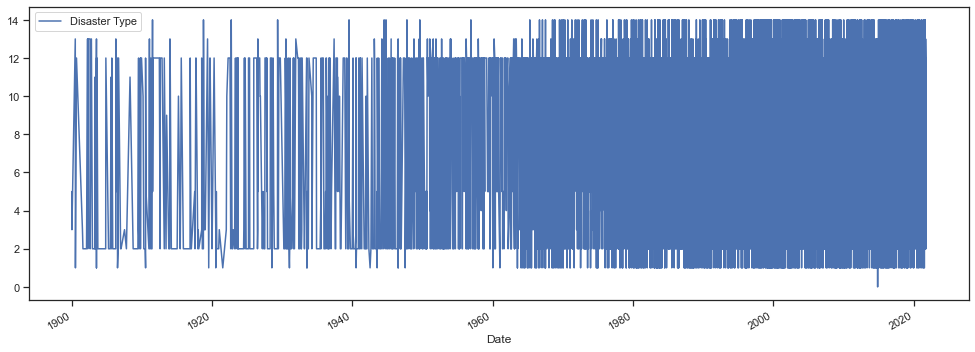

In [52]:
#visualizing time series data
y.plot(figsize=(15, 6))
plt.show()

In [53]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

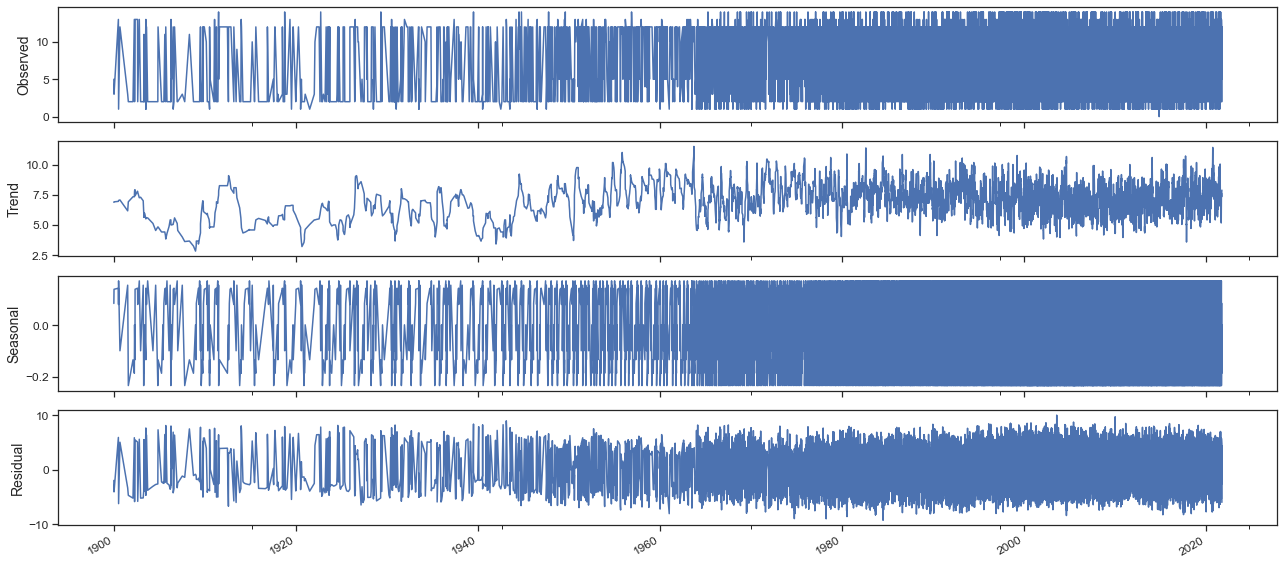

In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=12, extrapolate_trend = 12)
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average. ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.

In [63]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [64]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:84626.0007700063


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:79648.13583590185


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:75979.30122750788


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:67945.47266185522


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:74429.85163739318


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:68032.45648157333


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:72446.37646946922


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:67944.99940854678


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:79897.90033710077


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:77381.67082881872


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:75966.14752192356


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:67936.59364792352
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:74336.01061660134


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:68021.93429110156


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:72434.12103192732


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:67935.27877557126


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:76519.62665537691


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:76432.18954173653


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:84549.195923966


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:76432.73469012117


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:76437.58237443319


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:76434.1895367986


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:81132.4123525511


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:76431.62429956399


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:67956.71091714854


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:67884.57725769785


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:75979.13011335222


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:67892.583788512


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:67897.73393878911


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:67886.29272510024


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:72452.70371391615


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:67894.57392187926


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:74898.84022931423


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:74609.81529665113


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:75974.51560162212


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:67943.51939817463


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:74280.73623143887


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:68027.5990975554


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:72428.30607418696


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:67943.08596790208


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:68277.23322146281


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:68203.16196959122


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:75967.95669652498


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:67935.9394552809


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:67899.27904467622


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:67984.89320693346


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:72430.23824144754


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:67935.47944815666
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:72769.36578259377


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:72689.05468947216


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:80871.5788570088


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:72694.3582032191


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:72689.04804334311


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:72691.04759361551


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:77379.8809545252


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:72694.09264929607


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:67949.6025267438


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:67877.84879316269


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:75974.3831349808


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:67885.26774493567


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:67885.61494635262


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:67879.79579148957


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:72434.43701157445


C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:67887.2601296835


The above output suggests that SARIMAX(0, 0, 1)x(1, 1, 1, 12)12  yields the lowest AIC value of 67935.27877557126. Therefore we should consider this to be optimal option.

In [65]:
#fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0176      0.009     -1.903      0.057      -0.036       0.001
ar.S.L12       0.0073      0.004      1.718      0.086      -0.001       0.016
ma.S.L12      -1.0038      0.001   -818.801      0.000      -1.006      -1.001
sigma2        17.0051      0.436     39.015      0.000      16.151      17.859


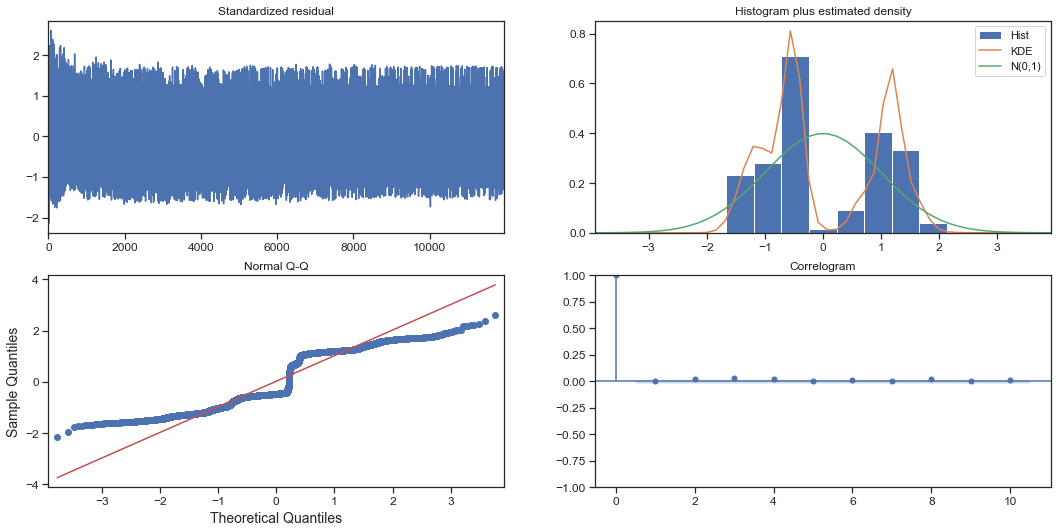

In [66]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

To help us understand the accuracy of our forecasts, we compare predicted results to real results of the time series, and we set forecasts to start at 2019–01–01 to the end of the data.

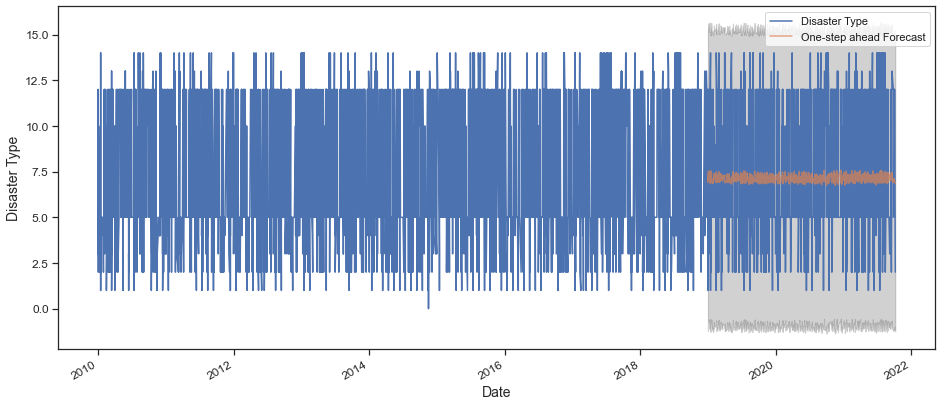

In [72]:
#validating forecasts
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Disaster Type')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions.

C:\Users\sowmy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


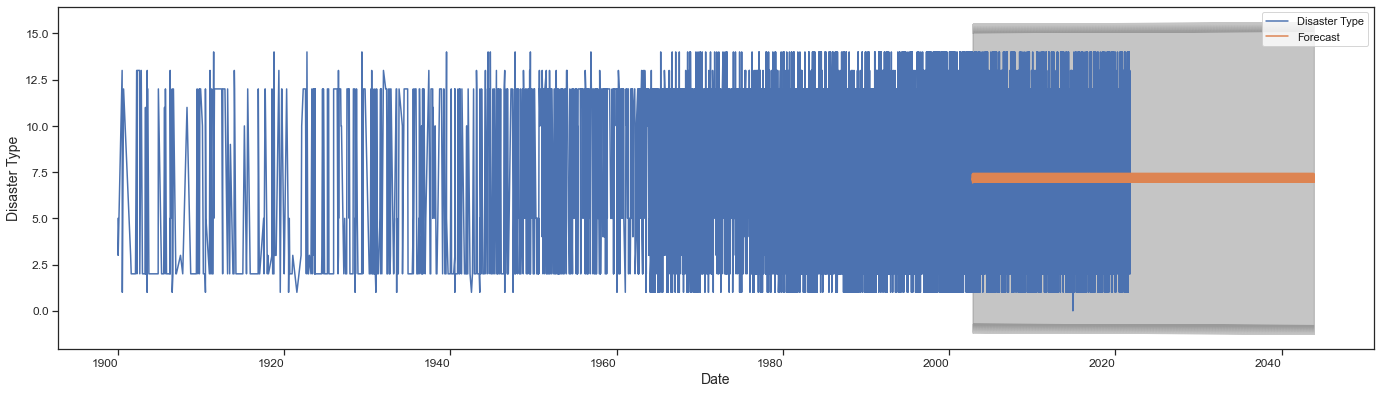

In [88]:
#Producing and visualizing forecasts
pred_uc = results.get_forecast(steps=15000)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(21, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Disaster Type')
plt.legend()
plt.show()

Our model clearly captured disaster type seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

### Loading Data set into Azure SQL

In [36]:
#defining connection parameters
import pyodbc
server = 'tcp:msc-dat-analytics.database.windows.net'
database = 'mscDAT'
username = 'dap'
password = 'India-data-analytics'
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

In [37]:
cursor = cnxn.cursor()

In [38]:
cursor.execute('''
IF OBJECT_ID('Natural_Disaster_Events', 'U') IS NOT NULL
DROP TABLE Natural_Disaster_Events;
''')

In [35]:
data.head(1)

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,Unknown,Natural,Climatological,Drought,Drought,Unknown,Unknown,Cabo Verde,...,10000.0,3000.0,5965.0,172500.0,60000.0,3.221647,Unknown,Unknown,Unknown,Unknown


In [31]:
data['TotalDeaths']=data['Total Deaths']
del data['Total Deaths']
data['DisasterType']=data['Disaster Type']
del data['Disaster Type']

In [32]:
data = data.sample(n = 1500)

In [34]:
data.shape

(1500, 45)

In [35]:
for col in data.columns:
    print(col)


Year
Seq
Glide
Disaster Group
Disaster Subgroup
Disaster Subtype
Disaster Subsubtype
Event Name
Country
ISO
Region
Continent
Location
Origin
Associated Dis
Associated Dis2
OFDA Response
Appeal
Declaration
Aid Contribution
Dis Mag Value
Dis Mag Scale
Latitude
Longitude
Local Time
River Basin
Start Year
Start Month
Start Day
End Year
End Month
End Day
No Injured
No Affected
No Homeless
Total Affected
Insured Damages ('000 US$)
Total Damages ('000 US$)
CPI
Adm Level
Admin1 Code
Admin2 Code
Geo Locations
TotalDeaths
DisasterType


In [39]:
#Creating risk country table
cursor.execute('''
CREATE TABLE Natural_Disaster_Events
(
DisasterYear varchar(30),
DisasterSeq varchar(30),
Country varchar(60),
Origin varchar(30),
Latitude varchar(30),
Longitude varchar(30),
TotalDeaths varchar(30),
DisasterType varchar(30),




--FOREIGN KEY (Country) REFERENCES Natural_Disaster_Events(Country)
);
''')

In [40]:
for index, row in data.iterrows():
    cursor.execute("INSERT INTO Natural_Disaster_Events(DisasterYear,DisasterSeq,Country,Origin,Latitude,Longitude,TotalDeaths,DisasterType) values(?,?,?,?,?,?,?,?)", row.Year,row.Seq,row.Country,row.Origin,row.Latitude,row.Longitude,row.TotalDeaths,row.DisasterType)
cnxn.commit()

ProgrammingError: ('42000', "[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]String or binary data would be truncated in table 'MscDAT.dbo.Natural_Disaster_Events', column 'Origin'. Truncated value: 'Heavy rain due to the influenc'. (2628) (SQLExecDirectW); [42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The statement has been terminated. (3621)")

In [ ]:
def select_disaterInfo(cnxn):      
    cur = cnxn.cursor()
    cur.execute("SELECT * FROM Natural_Disaster_Events")

    rows = cur.fetchall()
    
    for row in rows:
        print(row)
select_disaterInfo(cnxn)